# Final Project Options:
√ 1- Apply supervised or un-supervised models to a dataset (or problem) you are interested in. Investigate variety of steps
to make the model better including:
  - Hyper-parameter tuning by Grid-search
  - Check if dataset is balanced or not -> change the threshold
  - Data preprocessing (scaling)
  - Dimensionality reduction (PCA) -> train the model based on X_reduced_train and Y_reduced_train
  - Eliminate unnecessary features -> Feature Engineering
  - Try other models and do the above all steps

√ 2- Read blogs about Feature Engineering and make your model performance better with variety of Feature Engineering options:
- https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

3- Build a Decision Tree (DT) classifier from Scratch (you can use Pandas or any other Python built-in functions) and provide DT visualization. For any categorical dataset, your function should return the optimal tree with the root and all appropriate leafs, max_depth of the tree and the visualized graph. You can follow the steps we explored in class but should work for any dataset for example if we pass Lens dataset. 

Option 1 is solo but you can work as a group for options 2 or 3.

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import statsmodels.api as sm

from sklearn import preprocessing, metrics, preprocessing, svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('2018_MatchData.csv').set_index("Week")
data

,Event,City,State,Country,Time,Match,Team,Alliance,Robot Number,adjustPoints,...,totalPoints,vaultBoostPlayed,vaultBoostTotal,vaultForcePlayed,vaultForceTotal,vaultLevitatePlayed,vaultLevitateTotal,vaultPoints,result,winMargin
Week,,,,,,,,,,,,,,,,,,,,,
6,abca,Calgary,AB,Canada,2018-04-07 17:50:56,f1m1,2130,blue,1,0,...,271,0,0,0,0,3,3,15,L,-108
6,abca,Calgary,AB,Canada,2018-04-07 17:50:56,f1m1,3250,blue,2,0,...,271,0,0,0,0,3,3,15,L,-108
6,abca,Calgary,AB,Canada,2018-04-07 17:50:56,f1m1,5630,blue,3,0,...,271,0,0,0,0,3,3,15,L,-108
6,abca,Calgary,AB,Canada,2018-04-07 17:50:56,f1m1,359,red,1,0,...,379,3,3,1,1,3,3,35,W,108
6,abca,Calgary,AB,Canada,2018-04-07 17:50:56,f1m1,2122,red,2,0,...,379,3,3,1,1,3,3,35,W,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,wimi,Milwaukee,WI,USA,2018-03-24 16:11:12,sf2m2,2202,blue,2,0,...,336,3,3,2,2,3,3,40,L,-33
4,wimi,Milwaukee,WI,USA,2018-03-24 16:11:12,sf2m2,3418,blue,3,0,...,336,3,3,2,2,3,3,40,L,-33
4,wimi,Milwaukee,WI,USA,2018-03-24 16:11:12,sf2m2,2194,red,1,0,...,369,3,3,0,2,3,3,40,W,33


In [3]:
# Categorical = ['Event','City','State','Country','Match','Alliance','autoQuestRankingPoint','autoRun',
#                'autoSwitchAtZero','endgame','faceTheBossRankingPoint','tba_gameData','result']


data = Team2927 = data[data['Team'] == 2927].set_index(['Event', 'Match', 'Alliance'])
#                 .drop(columns=['Event','City','State','Country','Time',
#                        'Match','Alliance','autoQuestRankingPoint',
#                        'autoRun','autoSwitchAtZero','endgame','faceTheBossRankingPoint',
#                        'Robot Number', 'adjustPoints', 'tba_gameData'
#                       ]).set_index('Team')


label_encoder = LabelEncoder()
for i in data.columns:
    data[i] = label_encoder.fit_transform(data[i]).astype('float64')

y = data['result']
x = data.drop(columns=['result'])
x

City  State  Country  Time  Team  Robot Number  \
Event Match Alliance                                                   
waahs qf4m1 red        0.0    0.0      0.0  12.0   0.0           2.0   
      qf4m2 red        0.0    0.0      0.0  13.0   0.0           2.0   
      qm1   red        0.0    0.0      0.0   0.0   0.0           2.0   
      qm15  blue       0.0    0.0      0.0   2.0   0.0           2.0   
      qm19  red        0.0    0.0      0.0   3.0   0.0           1.0   
      qm27  red        0.0    0.0      0.0   4.0   0.0           2.0   
      qm35  blue       0.0    0.0      0.0   5.0   0.0           1.0   
      qm39  blue       0.0    0.0      0.0   6.0   0.0           1.0   
      qm45  blue       0.0    0.0      0.0   7.0   0.0           2.0   
      qm53  blue       0.0    0.0      0.0   8.0   0.0           0.0   
      qm55  red        0.0    0.0      0.0   9.0   0.0           0.0   
      qm64  blue       0.0    0.0      0.0  10.0   0.0           0.0   
      qm68  red        0.0    0.0      0.0  11.0   0.0           1.0   
      qm9   red        0.0    0.0      0.0   1.0   0.0           1.0   
      sf2m1 blue       0.0    0.0      0.0  14.0   0.0           2.0   
waamv qm10  red        0.0    0.0      0.0  16.0   0.0           0.0   
      qm13  red        0.0    0.0      0.0  17.0   0.0           1.0   
      qm19  blue       0.0    0.0      0.0  18.0   0.0           0.0   
      qm30  red        0.0    0.0      0.0  19.0   0.0           0.0   
      qm34  blue       0.0    0.0      0.0  20.0   0.0           1.0   
      qm36  red        0.0    0.0      0.0  21.0   0.0           2.0   
      qm45  blue       0.0    0.0      0.0  22.0   0.0           2.0   
      qm49  red        0.0    0.0      0.0  23.0   0.0           2.0   
      qm5   blue       0.0    0.0      0.0  15.0   0.0           1.0   
      qm54  blue       0.0    0.0      0.0  24.0   0.0           0.0   
      qm63  blue       0.0    0.0      0.0  25.0   0.0           1.0   
      qm65  red        0.0    0.0      0.0  26.0   0.0           2.0   

                      adjustPoints  autoOwnershipPoints  autoPoints  \
Event Match Alliance                                                  
waahs qf4m1 red                0.0                  0.0         2.0   
      qf4m2 red                0.0                  2.0         5.0   
      qm1   red                0.0                  0.0         1.0   
      qm15  blue               0.0                  6.0         8.0   
      qm19  red                0.0                  0.0         1.0   
      qm27  red                0.0                  3.0         4.0   
      qm35  blue               0.0                  0.0         2.0   
      qm39  blue               0.0                  5.0         7.0   
      qm45  blue               0.0                  0.0         1.0   
      qm53  blue               0.0                  5.0        10.0   
      qm55  red                0.0                  0.0         2.0   
      qm64  blue               0.0                  5.0        10.0   
      qm68  red                0.0                  0.0         2.0   
      qm9   red                0.0                  0.0         0.0   
      sf2m1 blue               0.0                  1.0         3.0   
waamv qm10  red                0.0                  4.0         9.0   
      qm13  red                0.0                  4.0         6.0   
      qm19  blue               0.0                  8.0        13.0   
      qm30  red                0.0                  0.0         1.0   
      qm34  blue               0.0                  6.0        11.0   
      qm36  red                0.0                  0.0         2.0   
      qm45  blue               0.0                  0.0         1.0   
      qm49  red                0.0                  0.0         2.0   
      qm5   blue               0.0                  0.0         0.0   
      qm54  blue               0.0                  0.0         2.0   
      qm63  blue

# 1. Filter Method:
As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

The correlation coefficient has values between -1 to 1

    — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    — A value closer to 1 implies stronger positive correlation
    — A value closer to -1 implies stronger negative correlation

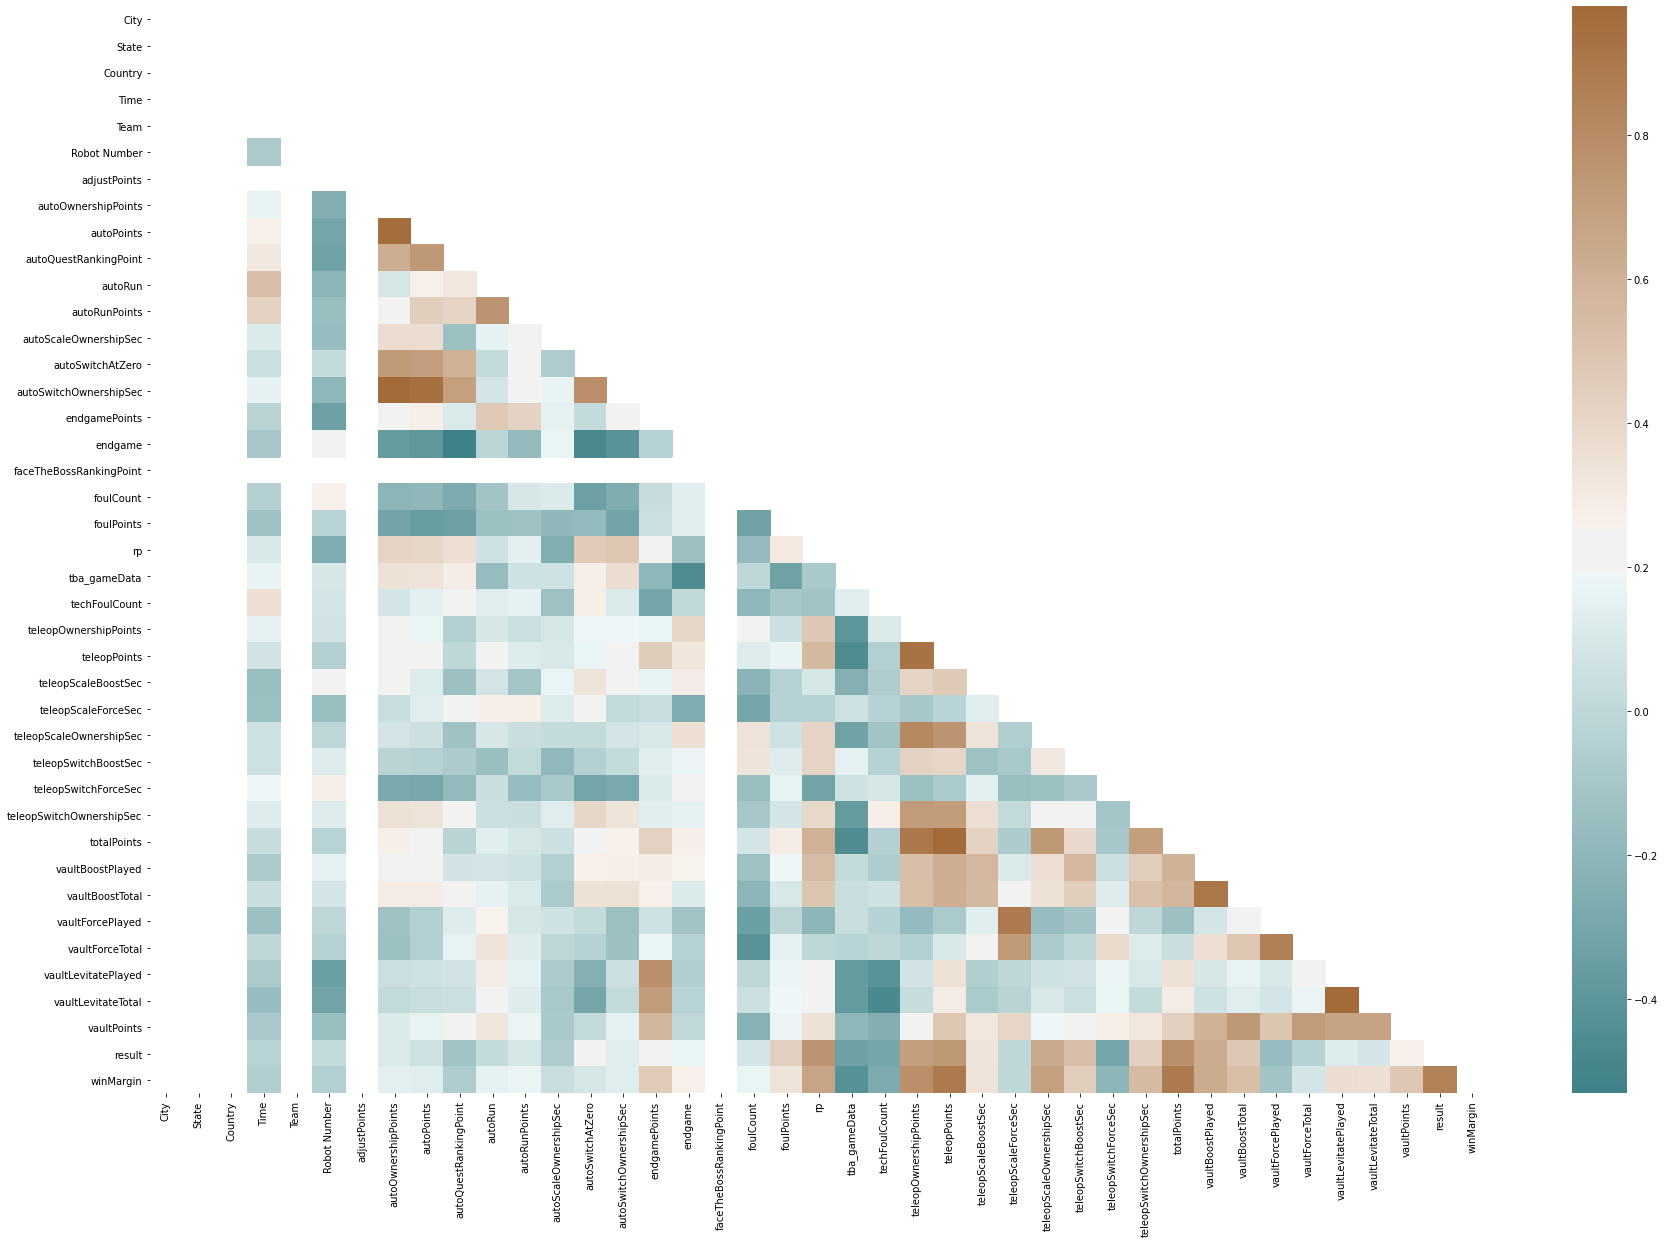

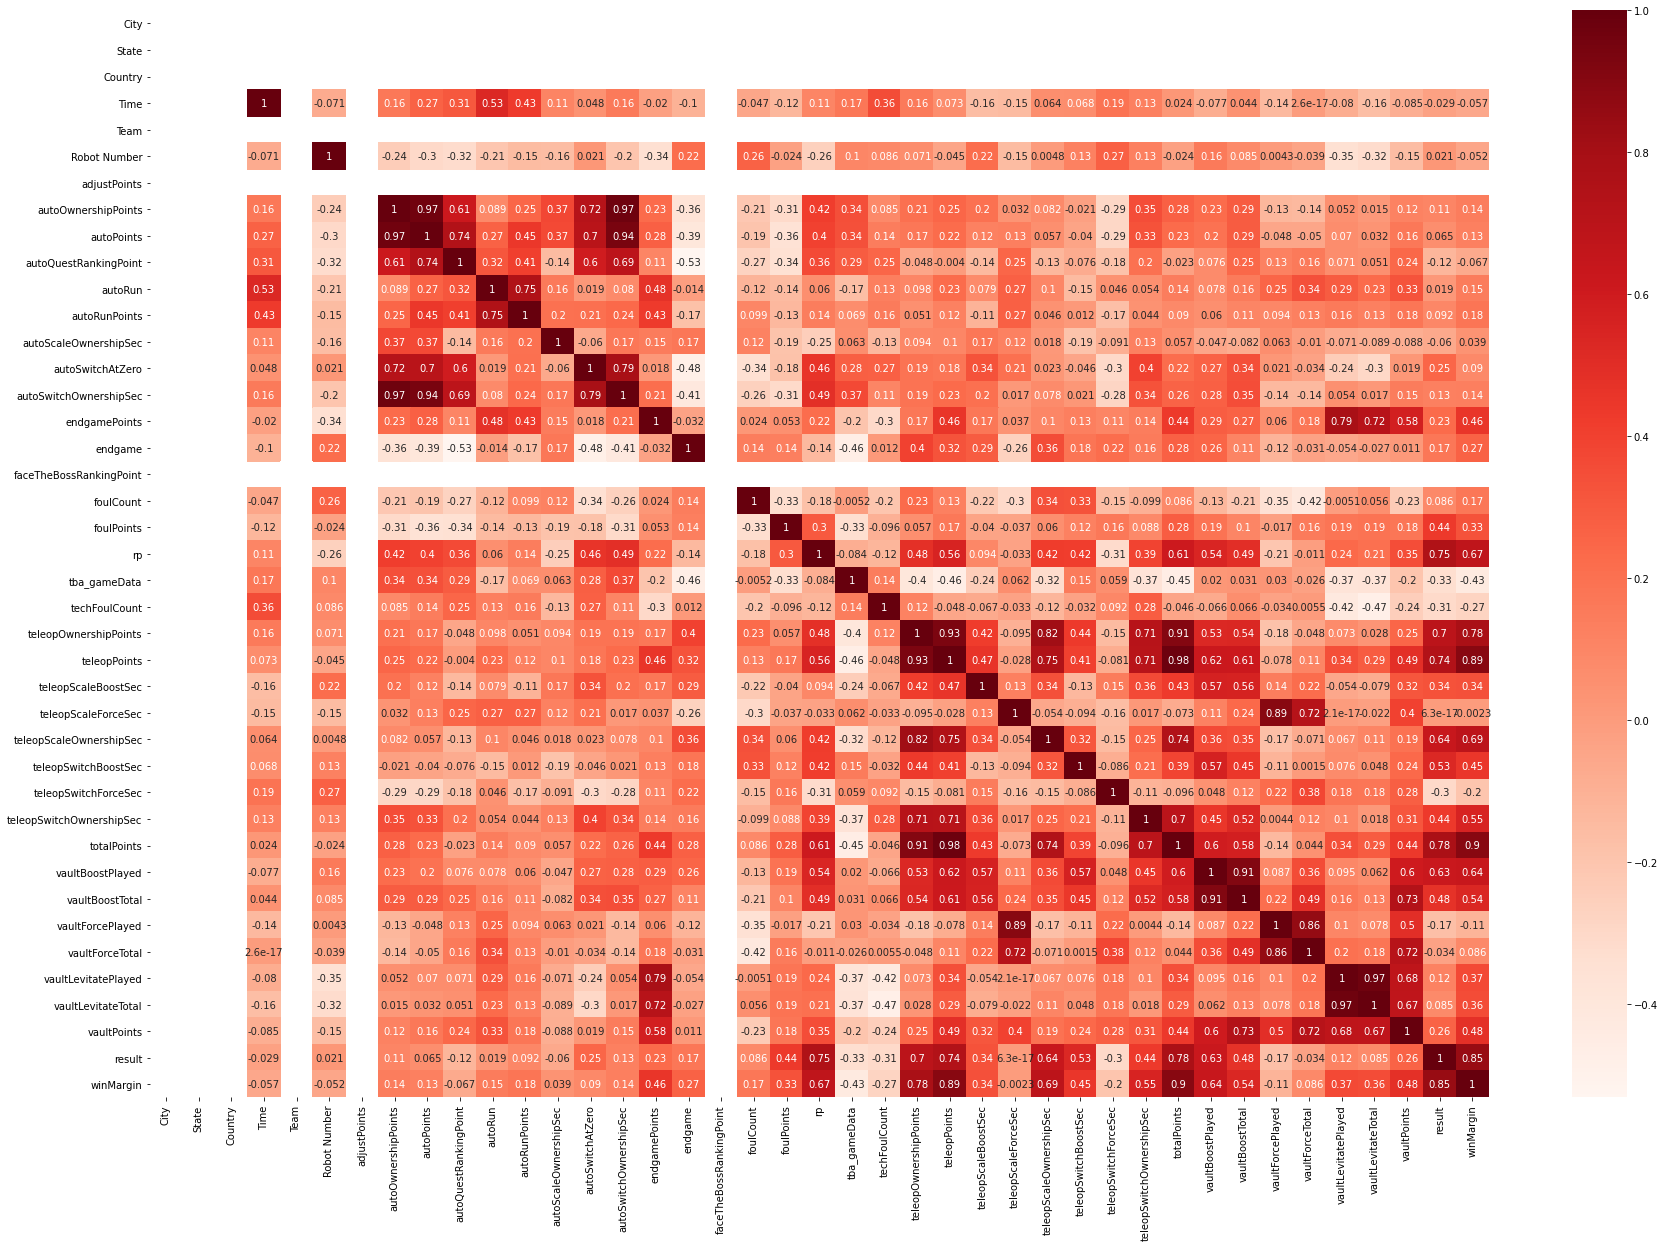

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(30,20))
corr = data.corr()

# sns.heatmap(corr)

# Can be great to plot only a half matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(200, 40, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)

plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

### Next, we compare the correlation between features and remove features that have a correlation higher than 0.9

In [5]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
print(selected_columns)
data

Index(['City', 'State', 'Country', 'Time', 'Team', 'Robot Number',
       'adjustPoints', 'autoOwnershipPoints', 'autoQuestRankingPoint',
       'autoRun', 'autoRunPoints', 'autoScaleOwnershipSec', 'autoSwitchAtZero',
       'endgamePoints', 'endgame', 'faceTheBossRankingPoint', 'foulCount',
       'foulPoints', 'rp', 'tba_gameData', 'techFoulCount',
       'teleopOwnershipPoints', 'teleopScaleBoostSec', 'teleopScaleForceSec',
       'teleopScaleOwnershipSec', 'teleopSwitchBoostSec',
       'teleopSwitchForceSec', 'teleopSwitchOwnershipSec', 'vaultBoostPlayed',
       'vaultForcePlayed', 'vaultForceTotal', 'vaultLevitatePlayed',
       'vaultPoints', 'result', 'winMargin'],
      dtype='object')


City  State  Country  Time  Team  Robot Number  \
Event Match Alliance                                                   
waahs qf4m1 red        0.0    0.0      0.0  12.0   0.0           2.0   
      qf4m2 red        0.0    0.0      0.0  13.0   0.0           2.0   
      qm1   red        0.0    0.0      0.0   0.0   0.0           2.0   
      qm15  blue       0.0    0.0      0.0   2.0   0.0           2.0   
      qm19  red        0.0    0.0      0.0   3.0   0.0           1.0   
      qm27  red        0.0    0.0      0.0   4.0   0.0           2.0   
      qm35  blue       0.0    0.0      0.0   5.0   0.0           1.0   
      qm39  blue       0.0    0.0      0.0   6.0   0.0           1.0   
      qm45  blue       0.0    0.0      0.0   7.0   0.0           2.0   
      qm53  blue       0.0    0.0      0.0   8.0   0.0           0.0   
      qm55  red        0.0    0.0      0.0   9.0   0.0           0.0   
      qm64  blue       0.0    0.0      0.0  10.0   0.0           0.0   
      qm68  red        0.0    0.0      0.0  11.0   0.0           1.0   
      qm9   red        0.0    0.0      0.0   1.0   0.0           1.0   
      sf2m1 blue       0.0    0.0      0.0  14.0   0.0           2.0   
waamv qm10  red        0.0    0.0      0.0  16.0   0.0           0.0   
      qm13  red        0.0    0.0      0.0  17.0   0.0           1.0   
      qm19  blue       0.0    0.0      0.0  18.0   0.0           0.0   
      qm30  red        0.0    0.0      0.0  19.0   0.0           0.0   
      qm34  blue       0.0    0.0      0.0  20.0   0.0           1.0   
      qm36  red        0.0    0.0      0.0  21.0   0.0           2.0   
      qm45  blue       0.0    0.0      0.0  22.0   0.0           2.0   
      qm49  red        0.0    0.0      0.0  23.0   0.0           2.0   
      qm5   blue       0.0    0.0      0.0  15.0   0.0           1.0   
      qm54  blue       0.0    0.0      0.0  24.0   0.0           0.0   
      qm63  blue       0.0    0.0      0.0  25.0   0.0           1.0   
      qm65  red        0.0    0.0      0.0  26.0   0.0           2.0   

                      adjustPoints  autoOwnershipPoints  \
Event Match Alliance                                      
waahs qf4m1 red                0.0                  0.0   
      qf4m2 red                0.0                  2.0   
      qm1   red                0.0                  0.0   
      qm15  blue               0.0                  6.0   
      qm19  red                0.0                  0.0   
      qm27  red                0.0                  3.0   
      qm35  blue               0.0                  0.0   
      qm39  blue               0.0                  5.0   
      qm45  blue               0.0                  0.0   
      qm53  blue               0.0                  5.0   
      qm55  red                0.0                  0.0   
      qm64  blue               0.0                  5.0   
      qm68  red                0.0                  0.0   
      qm9   red                0.0                  0.0   
      sf2m1 blue               0.0                  1.0   
waamv qm10  red                0.0                  4.0   
      qm13  red                0.0                  4.0   
      qm19  blue               0.0                  8.0   
      qm30  red                0.0                  0.0   
      qm34  blue               0.0                  6.0   
      qm36  red                0.0                  0.0   
      qm45  blue               0.0                  0.0   
      qm49  red                0.0                  0.0   
      qm5   blue               0.0                  0.0   
      qm54  blue               0.0                  0.0   
      qm63  blue               0.0                  7.0   
      qm65  red                0.0                  5.0   

                      autoQuestRankingPoint  autoRun  ...  \
Event Match Alliance                                  ...   
waahs qf4m1 red                         0.0      1.0  ...   
      qf4m2 red                       

### Now, the dataset has only those columns with correlation less than 0.9

In [6]:
#Correlation with output variable
cor_target = abs(corr["result"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.9]
relevant_features

result    1.0
Name: result, dtype: float64

## As we can see, the features 
#### [rp, teleopOwnershipPoints, teleopPoints, teleopScaleBoostSec, teleopScaleOwnershipSec, totalPoints, and winMargin] 
### are highly correlated with the output variable result. 

Hence we will drop all other features apart from these. However **this is not the end of the process**. One of the assumptions of **linear regression** is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [18]:
# 'teleopPoints', 'totalPoints',
simple_corr = data[['winMargin', 'teleopOwnershipPoints',
                    'teleopScaleOwnershipSec', 'rp',
                    'vaultBoostPlayed', 'teleopSwitchOwnershipSec',
                    'teleopScaleBoostSec']].corr()
simple_corr

,winMargin,teleopOwnershipPoints,teleopScaleOwnershipSec,rp,vaultBoostPlayed,teleopSwitchOwnershipSec,teleopScaleBoostSec
winMargin,1.000000,0.827864,0.723246,0.686680,0.645354,0.552936,0.323817
teleopOwnershipPoints,0.827864,1.000000,0.822071,0.505978,0.549879,0.740259,0.409581
teleopScaleOwnershipSec,0.723246,0.822071,1.000000,0.418845,0.384673,0.230248,0.322279
rp,0.686680,0.505978,0.418845,1.000000,0.543163,0.356074,0.075676
vaultBoostPlayed,0.645354,0.549879,0.384673,0.543163,1.000000,0.425858,0.553880
teleopSwitchOwnershipSec,0.552936,0.740259,0.230248,0.356074,0.425858,1.000000,0.306161
teleopScaleBoostSec,0.323817,0.409581,0.322279,0.075676,0.553880,0.306161,1.000000


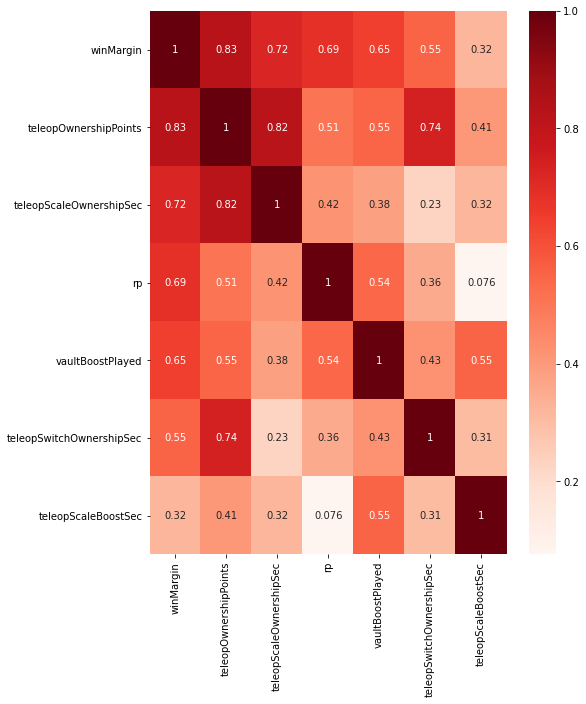

In [19]:
sns.heatmap(simple_corr, annot=True, cmap=plt.cm.Reds)

In [9]:
result = data.result

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.3)

In [11]:
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
prediction

array([1., 0., 1., 0., 0., 0., 1., 1., 1.])

In [12]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.8888888888888888


# 3. Embedded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [13]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)
# coef

Best alpha using built-in LassoCV: 0.003830
Best score using built-in LassoCV: 0.994186


In [14]:
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
ct = 0
cf = 0
for i in coef:
    if i != 0:
        ct += 1
    if i == 0:
        cf += 1
print("Lasso picked " + str(ct) + " variables and eliminated the other " +  str(cf) + " variables")

Lasso picked 20 variables and eliminated the other 20 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

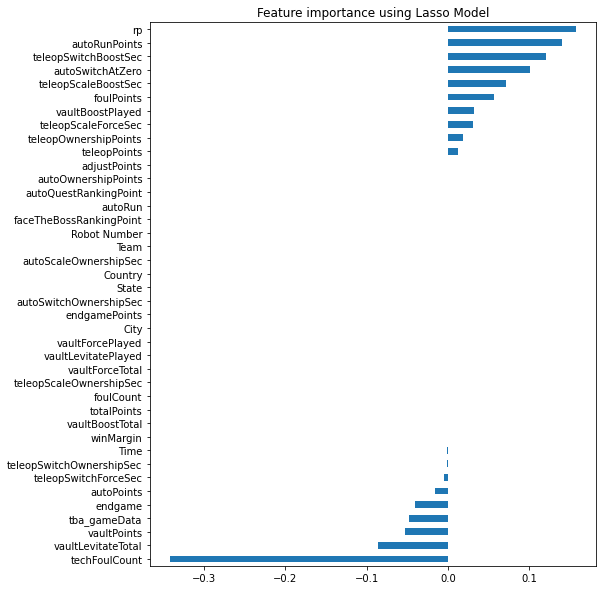

In [15]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_graphviz
import pydotplus

# read in the tennis data, need the extra parameters since it's a txt file
data = pd.read_csv('2018_MatchData.csv').set_index("Week")
data = Team2927 = data[data['Team'] == 2927].set_index(['Event', 'Match', 'Alliance'])

# encode the data so we can use it with our decision tree,
# by converting categories into numbers
data_encoded = data.apply(preprocessing.LabelEncoder().fit_transform)
# print(data_encoded)

# create our decision tree classifier with entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# one_hot_data = pd.get_dummies(data[['a', 'b', 'c', 'd']], drop_first=True)
# print(one_hot_data)

# provide our feature array and target array (1-item),
# and train the model using a decision tree
clf.fit(data_encoded[[
    'City', 'State', 'Country', 'Time', 'Team', 'Robot Number',
    'adjustPoints', 'autoOwnershipPoints', 'autoPoints',
    'autoQuestRankingPoint', 'autoRun', 'autoRunPoints',
    'autoScaleOwnershipSec', 'autoSwitchAtZero', 'autoSwitchOwnershipSec',
    'endgamePoints', 'endgame', 'faceTheBossRankingPoint', 'foulCount',
    'foulPoints', 'rp', 'tba_gameData', 'techFoulCount',
    'teleopOwnershipPoints', 'teleopPoints', 'teleopScaleBoostSec',
    'teleopScaleForceSec', 'teleopScaleOwnershipSec',
    'teleopSwitchBoostSec', 'teleopSwitchForceSec',
    'teleopSwitchOwnershipSec', 'totalPoints', 'vaultBoostPlayed',
    'vaultBoostTotal', 'vaultForcePlayed', 'vaultForceTotal',
    'vaultLevitatePlayed', 'vaultLevitateTotal', 'vaultPoints',
    'winMargin'
]], data_encoded['result'])

# export our decision tree into data that can be plotted
dot_data = export_graphviz(clf, out_file=None, feature_names=[
    'City', 'State', 'Country', 'Time', 'Team', 'Robot Number',
    'adjustPoints', 'autoOwnershipPoints', 'autoPoints',
    'autoQuestRankingPoint', 'autoRun', 'autoRunPoints',
    'autoScaleOwnershipSec', 'autoSwitchAtZero', 'autoSwitchOwnershipSec',
    'endgamePoints', 'endgame', 'faceTheBossRankingPoint', 'foulCount',
    'foulPoints', 'rp', 'tba_gameData', 'techFoulCount',
    'teleopOwnershipPoints', 'teleopPoints', 'teleopScaleBoostSec',
    'teleopScaleForceSec', 'teleopScaleOwnershipSec',
    'teleopSwitchBoostSec', 'teleopSwitchForceSec',
    'teleopSwitchOwnershipSec', 'totalPoints', 'vaultBoostPlayed',
    'vaultBoostTotal', 'vaultForcePlayed', 'vaultForceTotal',
    'vaultLevitatePlayed', 'vaultLevitateTotal', 'vaultPoints',
    'winMargin'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('obstical_tree.png')

True

![obstical_tree.png](./obstical_tree.png)

# Event Details
- [2018 FIRST Robotics Competition - FIRST POWER UP Game PREVIEW](https://www.youtube.com/watch?v=HZbdwYiCY74)

- [2018 FRCGame Season Manual](https://firstfrc.blob.core.windows.net/frc2018/Manual/2018FRCGameSeasonManual.pdf)

- [PNW District Auburn Event 2018](https://www.thebluealliance.com/event/2018waahs)
- [PNW District Auburn Event Insights 2018](https://www.thebluealliance.com/event/2018waahs#event-insights)

- [PNW District Auburn Mountainview Event 2018](https://www.thebluealliance.com/event/2018waamv)
- [PNW District Auburn Mountainview Event Insights 2018](https://www.thebluealliance.com/event/2018waamv#event-insights)

- [Team 2927: πRho Techs](https://www.thebluealliance.com/team/2927/2018)

# Conclusions

## Result
1. winMargin
2. teleopOwnershipPoints
3. teleopScaleOwnershipsec
4. rp
5. vaultboostplayed
6. teleopSwitchOwnershipSec
7. teleopScaleBoostSec